Import Libraries

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Load and Explore Dataset

In [344]:
# Hours_Studied: Number of hours the student studies per day or per week.
# Attendance: Percentage of classes the student attended.
# Parental_Involvement: Level of parents' engagement in the student's academic life (e.g., low/medium/high).
# Access_to_Resources: Availability of study materials (books, internet, laptop, etc.).
# Extracurricular_Activities: Participation in activities outside academics (sports, clubs, arts).
# Sleep_Hours: Average hours of sleep the student gets per night.
# Previous_Scores: Scores obtained by the student in previous exams.
# Motivation_Level: Student’s internal drive to study (often measured on a scale, e.g., 1–10).
# Internet_Access: Indicates whether the student has reliable internet access (yes/no or 0/1).
# Tutoring_Sessions: Number of tutoring or extra support sessions attended.
# Family_Income: Household income level of the student’s family.
# Teacher_Quality: Perceived or measured quality of teachers (rating or category).
# School_Type: Type of school the student attends (public, private, etc.).
# Peer_Influence: Effect of classmates/friends on the student’s academic behavior (positive/negative/neutral).
# Physical_Activity: Level of physical exercise per week (hours or rating).
# Learning_Disabilities: Whether the student has diagnosed learning disabilities (yes/no or 0/1).
# Parental_Education_Level: Highest education level achieved by parents.
# Distance_from_Home: Distance from the student's home to the school (in km or miles).
# Gender: Student’s gender.
# Exam_Score: Final exam score (target variable for prediction).

In [345]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [346]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6604,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6605,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6606,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6607,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [347]:
# check missing values
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609 entries, 0 to 6608
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6609 non-null   int64 
 1   Attendance                  6609 non-null   int64 
 2   Parental_Involvement        6609 non-null   object
 3   Access_to_Resources         6609 non-null   object
 4   Extracurricular_Activities  6609 non-null   object
 5   Sleep_Hours                 6609 non-null   int64 
 6   Previous_Scores             6609 non-null   int64 
 7   Motivation_Level            6609 non-null   object
 8   Internet_Access             6609 non-null   object
 9   Tutoring_Sessions           6609 non-null   int64 
 10  Family_Income               6609 non-null   object
 11  Teacher_Quality             6531 non-null   object
 12  School_Type                 6609 non-null   object
 13  Peer_Influence              6609 non-null   obje

Fill missing values

In [349]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [350]:
catg_cols = df.select_dtypes(include='object').columns
catg_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [351]:
catg_impute = SimpleImputer(missing_values=np.nan , strategy='most_frequent')

In [352]:
num_missing_cols = [col for col in num_cols if df[col].isna().sum() > 0]
catg_missing_cols = [col for col in catg_cols if df[col].isna().sum() > 0]

In [353]:
num_missing_cols

[]

In [354]:
catg_missing_cols

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

In [355]:
for col in catg_missing_cols:
    df[col] = catg_impute.fit_transform(df[[col]]).ravel()

In [356]:
# check missing values after impute
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [357]:
# check duplicates
df.duplicated().sum()

np.int64(2)

In [358]:
# drop duplicates
df = df.drop_duplicates()

In [359]:
# check duplicates after
df.duplicated().sum()

np.int64(0)

In [360]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Encode catg cols

In [361]:
catg_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [362]:
# ['Parental_Involvement' -> Ordinal encoder
# , 'Access_to_Resources', -> Ordinal encoder
#  'Extracurricular_Activities' -> Label Encoder
# ,'Motivation_Level', -> Ordinal encoder
# 'Internet_Access',  -> Label Encoder
#  'Family_Income', -> Ordinal encoder
#  'Teacher_Quality', -> Ordinal encoder
# 'School_Type',  -> Label Encoder
# 'Peer_Influence', -> Ordinal encoder
#  'Learning_Disabilities', -> Label Encoder
#  'Parental_Education_Level',  -> Label Encoder
#  'Distance_from_Home', -> Ordinal encoder
#  'Gender'  -> Label Encoder
# ] 

In [363]:
# Create individual encoders for each column to handle user input correctly
l_encoders = {}
od_encoders = {}

# Label encoders for binary/categorical columns
label_cols = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 
              'Learning_Disabilities', 'Parental_Education_Level', 'Gender']

for col in label_cols:
    l_encoders[col] = LabelEncoder()
    df[col] = l_encoders[col].fit_transform(df[col])

# Ordinal encoders for ordinal columns
ordinal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
                'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Distance_from_Home']

for col in ordinal_cols:
    od_encoders[col] = OrdinalEncoder()
    df[col] = od_encoders[col].fit_transform(df[[col]])

print("✅ Encoders created for all categorical columns")

✅ Encoders created for all categorical columns


C:\Users\Bassam\AppData\Local\Temp\ipykernel_29120\1375356911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = l_encoders[col].fit_transform(df[col])
C:\Users\Bassam\AppData\Local\Temp\ipykernel_29120\1375356911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = l_encoders[col].fit_transform(df[col])
C:\Users\Bassam\AppData\Local\Temp\ipykernel_29120\1375356911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [365]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0,7,73,1.0,1,0,1.0,2.0,1,2.0,3,0,1,2.0,1,67
1,19,64,1.0,2.0,0,8,59,1.0,1,2,2.0,2.0,1,0.0,4,0,0,1.0,0,61
2,24,98,2.0,2.0,1,7,91,2.0,1,2,2.0,2.0,1,1.0,4,0,2,2.0,1,74
3,29,89,1.0,2.0,1,8,98,2.0,1,1,2.0,2.0,1,0.0,4,0,1,1.0,1,71
4,19,92,2.0,2.0,1,6,65,2.0,1,3,2.0,0.0,1,1.0,4,0,0,2.0,0,70
5,19,88,2.0,2.0,1,8,89,2.0,1,3,2.0,2.0,1,2.0,3,0,2,2.0,1,71
6,29,84,2.0,1.0,1,7,68,1.0,1,1,1.0,2.0,0,1.0,2,0,1,1.0,1,67
7,25,78,1.0,0.0,1,6,50,2.0,1,1,0.0,0.0,1,0.0,2,0,1,0.0,1,66
8,17,94,2.0,0.0,0,6,80,0.0,1,0,2.0,1.0,0,1.0,1,0,0,2.0,1,69
11,23,98,2.0,2.0,1,8,71,2.0,1,0,0.0,0.0,1,2.0,5,0,1,1.0,1,72


In [366]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0,7,73,1.0,1,0,1.0,2.0,1,2.0,3,0,1,2.0,1,67
1,19,64,1.0,2.0,0,8,59,1.0,1,2,2.0,2.0,1,0.0,4,0,0,1.0,0,61
2,24,98,2.0,2.0,1,7,91,2.0,1,2,2.0,2.0,1,1.0,4,0,2,2.0,1,74
3,29,89,1.0,2.0,1,8,98,2.0,1,1,2.0,2.0,1,0.0,4,0,1,1.0,1,71
4,19,92,2.0,2.0,1,6,65,2.0,1,3,2.0,0.0,1,1.0,4,0,0,2.0,0,70
5,19,88,2.0,2.0,1,8,89,2.0,1,3,2.0,2.0,1,2.0,3,0,2,2.0,1,71
6,29,84,2.0,1.0,1,7,68,1.0,1,1,1.0,2.0,0,1.0,2,0,1,1.0,1,67
7,25,78,1.0,0.0,1,6,50,2.0,1,1,0.0,0.0,1,0.0,2,0,1,0.0,1,66
8,17,94,2.0,0.0,0,6,80,0.0,1,0,2.0,1.0,0,1.0,1,0,0,2.0,1,69
11,23,98,2.0,2.0,1,8,71,2.0,1,0,0.0,0.0,1,2.0,5,0,1,1.0,1,72


Check Outliers

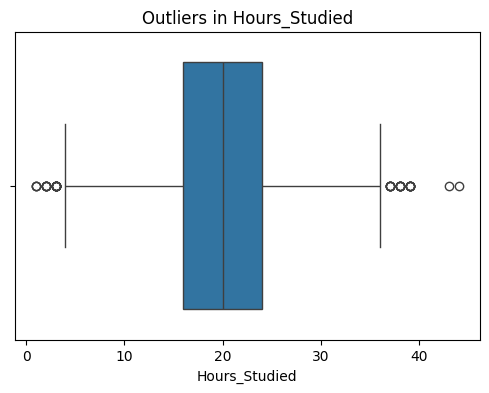

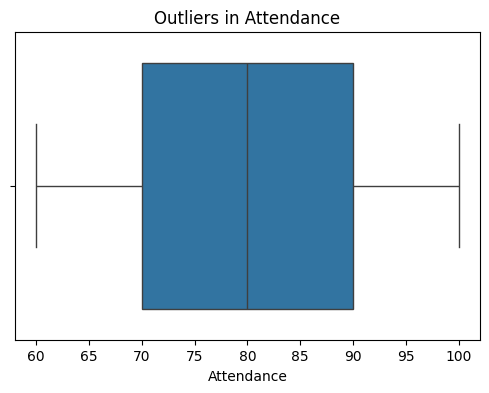

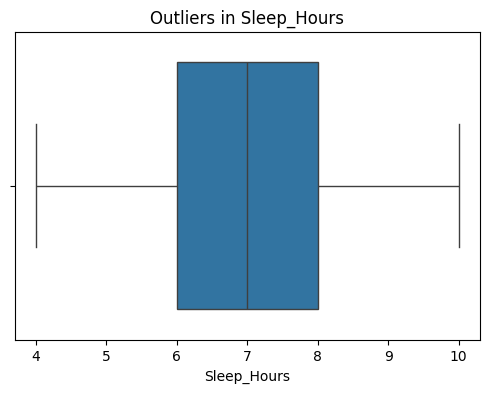

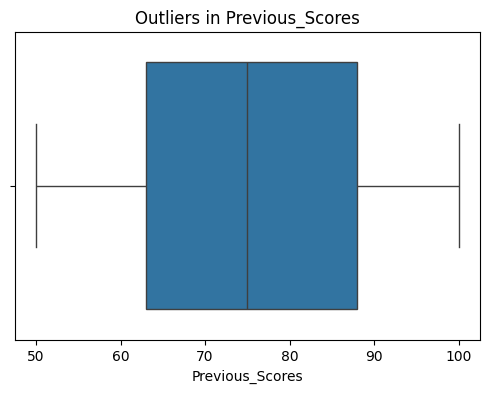

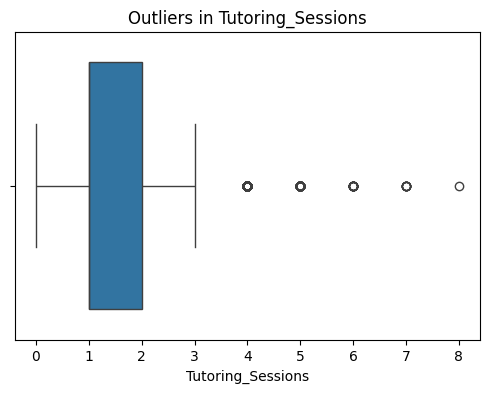

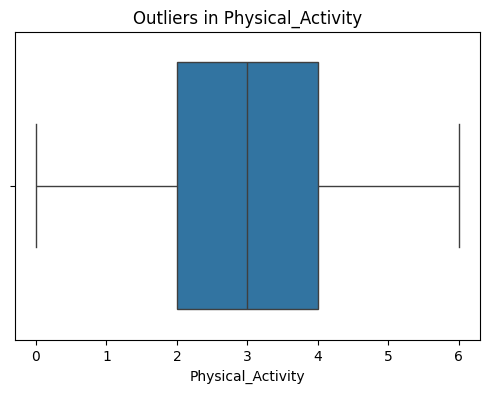

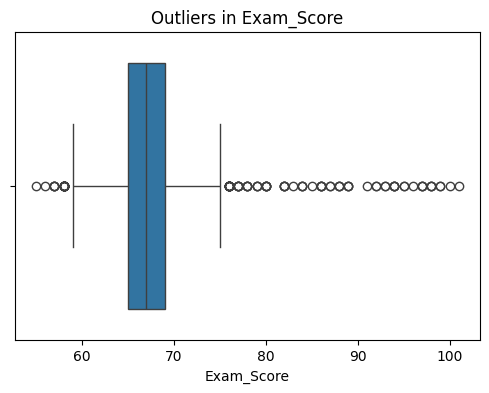

In [367]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [368]:
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# Columns to fix
cols = ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']

for col in cols:
    handle_outliers(df, col)

C:\Users\Bassam\AppData\Local\Temp\ipykernel_29120\661922035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\Bassam\AppData\Local\Temp\ipykernel_29120\661922035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\Bassam\AppData\Local\Temp\ipykernel_29120\661922035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

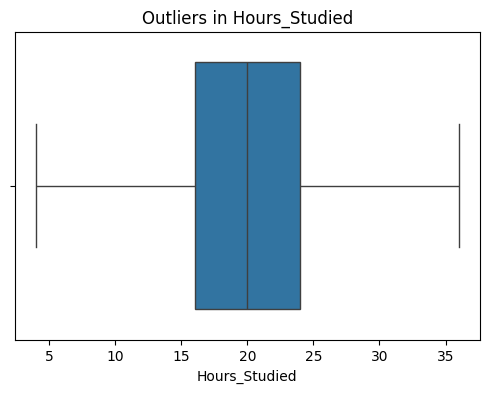

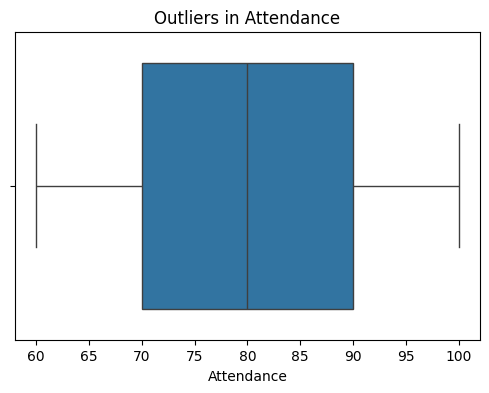

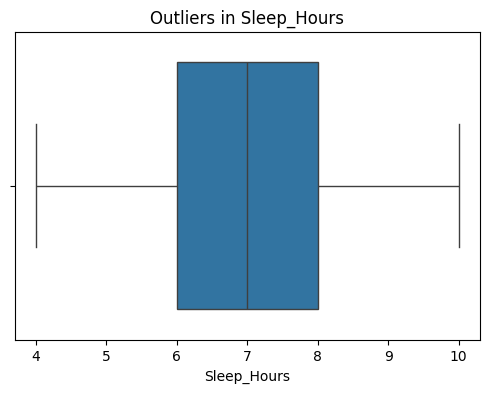

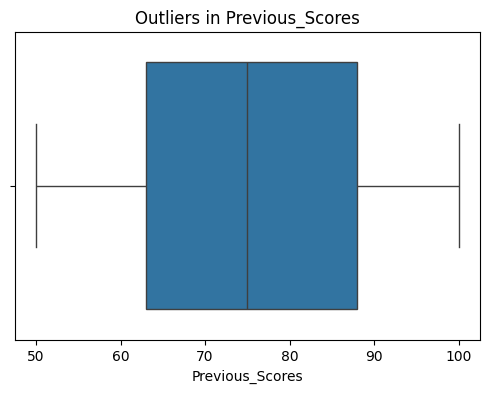

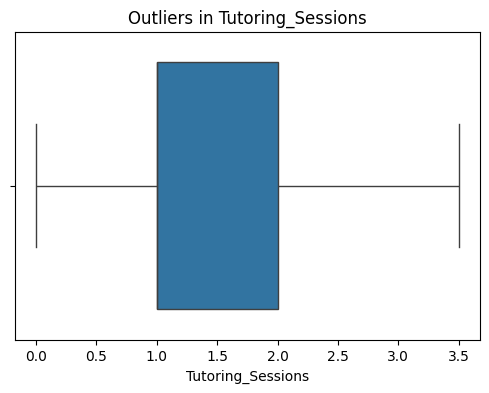

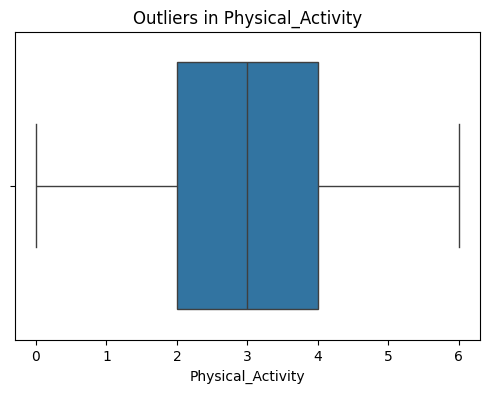

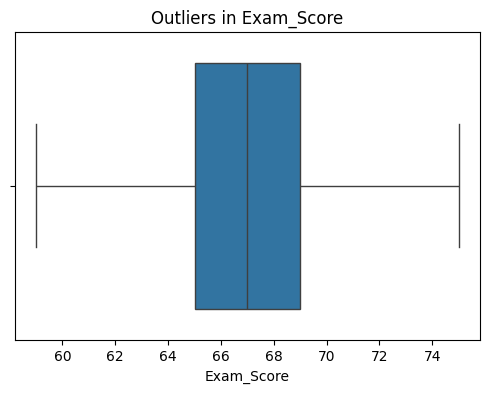

In [369]:
# check outliers after handling
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

Check Imbalanced

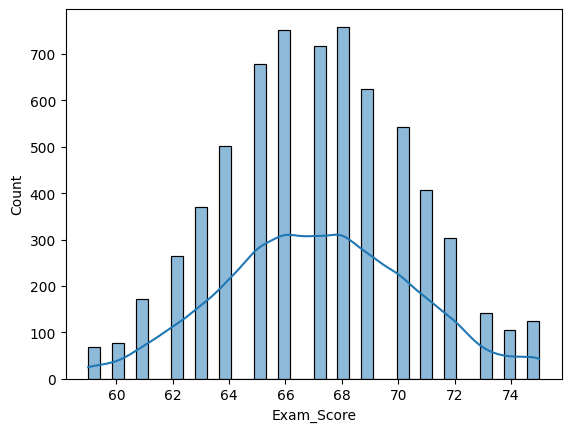

In [370]:
# check balanced dataset or not
sns.histplot(df,x='Exam_Score',kde=True)
plt.show()

In [371]:
# Handle Imbalanced
df['Exam_Score_log'] = np.log1p(df['Exam_Score'])

C:\Users\Bassam\AppData\Local\Temp\ipykernel_29120\516562522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exam_Score_log'] = np.log1p(df['Exam_Score'])


In [372]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Exam_Score_log
0,23,84,1.0,0.0,0,7,73,1.0,1,0.0,...,2.0,1,2.0,3,0,1,2.0,1,67,4.219508
1,19,64,1.0,2.0,0,8,59,1.0,1,2.0,...,2.0,1,0.0,4,0,0,1.0,0,61,4.127134
2,24,98,2.0,2.0,1,7,91,2.0,1,2.0,...,2.0,1,1.0,4,0,2,2.0,1,74,4.317488
3,29,89,1.0,2.0,1,8,98,2.0,1,1.0,...,2.0,1,0.0,4,0,1,1.0,1,71,4.276666
4,19,92,2.0,2.0,1,6,65,2.0,1,3.0,...,0.0,1,1.0,4,0,0,2.0,0,70,4.262680
5,19,88,2.0,2.0,1,8,89,2.0,1,3.0,...,2.0,1,2.0,3,0,2,2.0,1,71,4.276666
6,29,84,2.0,1.0,1,7,68,1.0,1,1.0,...,2.0,0,1.0,2,0,1,1.0,1,67,4.219508
7,25,78,1.0,0.0,1,6,50,2.0,1,1.0,...,0.0,1,0.0,2,0,1,0.0,1,66,4.204693
8,17,94,2.0,0.0,0,6,80,0.0,1,0.0,...,1.0,0,1.0,1,0,0,2.0,1,69,4.248495
11,23,98,2.0,2.0,1,8,71,2.0,1,0.0,...,0.0,1,2.0,5,0,1,1.0,1,72,4.290459


Data Split Process

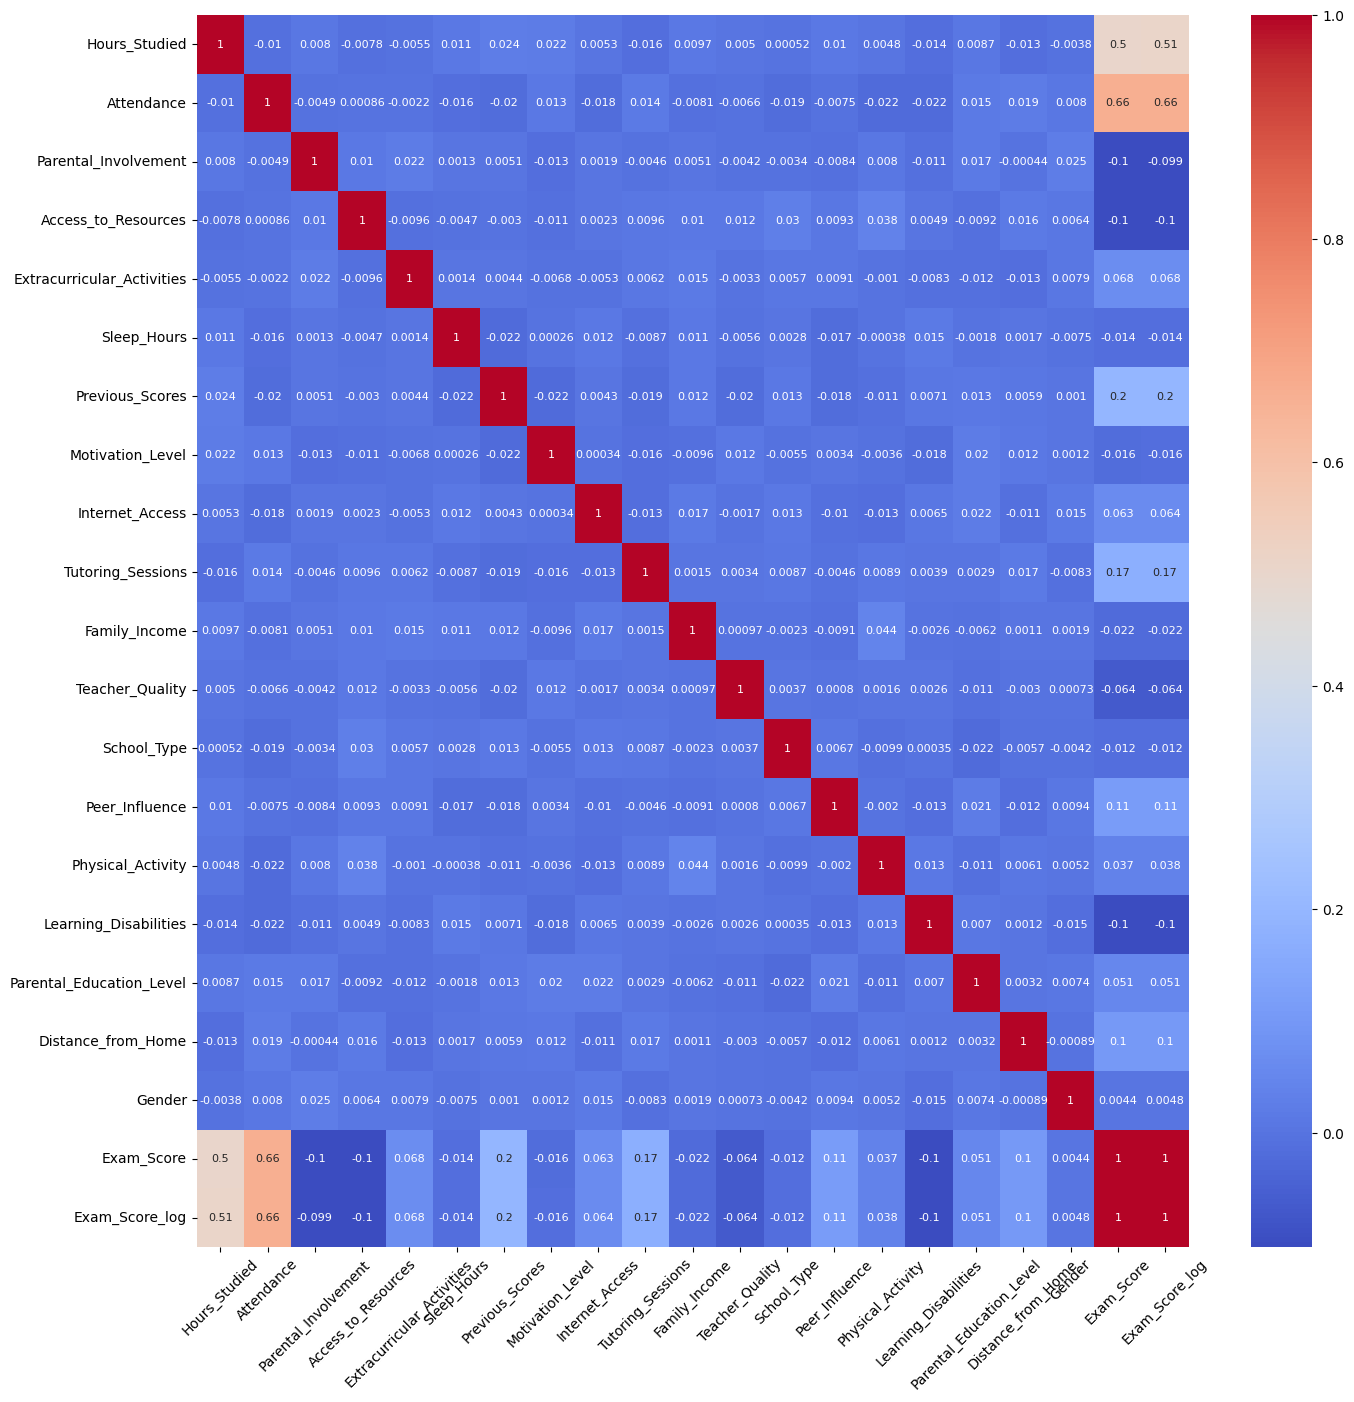

In [373]:
df_corr = df.corr()

plt.figure(figsize=(16,16))
sns.heatmap(df_corr, annot=True , cmap="coolwarm" ,  annot_kws={"size":8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [374]:
selected_features = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Motivation_Level',
    'Tutoring_Sessions',
    'Teacher_Quality'
]

In [375]:
X = df[selected_features]
y = df[['Exam_Score_log']]

In [376]:
X.head()

,Attendance,Hours_Studied,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality
0,84,23,73,1.0,0.0,2.0
1,64,19,59,1.0,2.0,2.0
2,98,24,91,2.0,2.0,2.0
3,89,29,98,2.0,1.0,2.0
4,92,19,65,2.0,3.0,0.0


In [377]:
y.head()

,Exam_Score_log
0,4.219508
1,4.127134
2,4.317488
3,4.276666
4,4.262680


In [378]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [379]:
scaler = StandardScaler()

In [380]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [381]:
selected_features = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Motivation_Level',
    'Tutoring_Sessions',
    'Teacher_Quality'
]

In [382]:
num_cols_to_scale = X.select_dtypes(include='number').columns
num_cols_to_scale

Index(['Attendance', 'Hours_Studied', 'Previous_Scores', 'Motivation_Level',
       'Tutoring_Sessions', 'Teacher_Quality'],
      dtype='object')

In [383]:
X_train_scaled[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])
X_test_scaled[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

Create Linear Regression model

In [384]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [385]:
# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

 Evaluate model


In [386]:
mse = mean_squared_error(y_test, lr_pred)
mae = mean_absolute_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)

print(f"R² Score:  {r2:.4f}")
print(f"MSE:       {mse:.4f}")
print(f"RMSE:      {rmse:.4f}")
print(f"MAE:       {mae:.4f}")

R² Score:  0.7857
MSE:       0.0005
RMSE:      0.0228
MAE:       0.0173


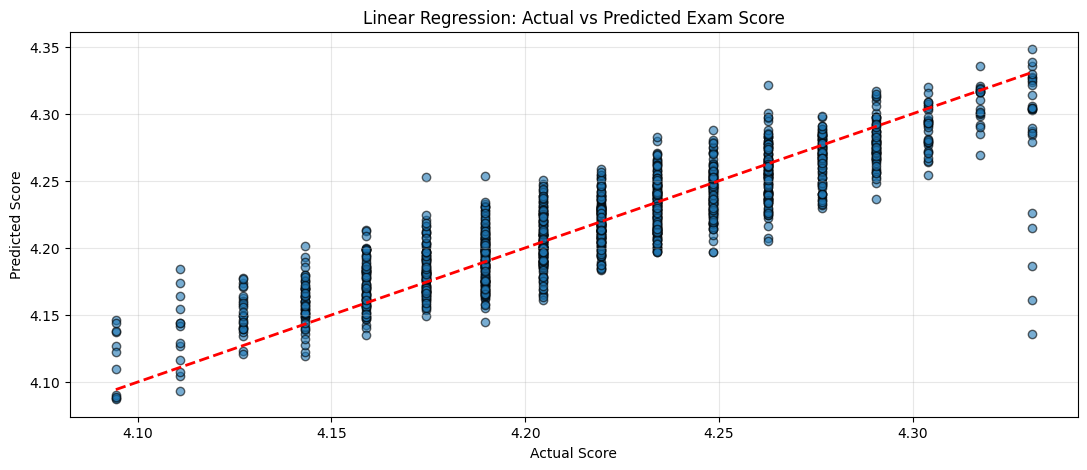

In [394]:
# Visualize predictions
plt.figure(figsize=(13, 5))
plt.scatter(y_test, lr_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Linear Regression: Actual vs Predicted Exam Score")
plt.grid(True, alpha=0.3)
plt.show()

User input

In [388]:
def predict_student_exam_score():
    """
    Interactive function to collect all student info but ONLY use selected features for prediction.
    """

    print("\n" + "="*70)
    print("📚 STUDENT EXAM SCORE PREDICTION SYSTEM".center(70))
    print("="*70)
    print("\nPlease enter the student's study factors and details:\n")

    # ------------------- Helper Functions -------------------
    def get_valid_number(prompt, min_val=None, max_val=None):
        while True:
            try:
                val = float(input(f"{prompt}: "))
                if min_val is not None and val < min_val:
                    print(f"❌ Value must be at least {min_val}")
                    continue
                if max_val is not None and val > max_val:
                    print(f"❌ Value must be at most {max_val}")
                    continue
                return val
            except ValueError:
                print("❌ Invalid input! Please enter a valid number.")

    def get_valid_choice(prompt, choices):
        while True:
            print(f"Available options: {', '.join(choices)}")
            val = input(f"{prompt}: ").strip()
            if val in choices:
                return val
            print(f"❌ Invalid input! Please enter one of: {', '.join(choices)}")

    # ------------------- Collect Inputs (ALL) -------------------
    hours_studied = get_valid_number("Hours Studied (per week)", 0, 40)
    attendance = get_valid_number("Attendance (%)", 0, 100)
    sleep_hours = get_valid_number("Sleep Hours (per night)", 0, 12)
    previous_scores = get_valid_number("Previous Test Score (%)", 0, 100)
    tutoring_sessions = get_valid_number("Tutoring Sessions (per month)", 0, 20)
    physical_activity = get_valid_number("Physical Activity (hours/week)", 0, 20)

    parental_involvement = get_valid_choice("Parental Involvement Level",
        od_encoders['Parental_Involvement'].categories_[0].tolist())
    access_to_resources = get_valid_choice("Access to Resources",
        od_encoders['Access_to_Resources'].categories_[0].tolist())
    motivation_level = get_valid_choice("Motivation Level",
        od_encoders['Motivation_Level'].categories_[0].tolist())
    family_income = get_valid_choice("Family Income Level",
        od_encoders['Family_Income'].categories_[0].tolist())
    teacher_quality = get_valid_choice("Teacher Quality",
        od_encoders['Teacher_Quality'].categories_[0].tolist())
    peer_influence = get_valid_choice("Peer Influence",
        od_encoders['Peer_Influence'].categories_[0].tolist())
    distance_from_home = get_valid_choice("Distance from Home",
        od_encoders['Distance_from_Home'].categories_[0].tolist())

    extracurricular = get_valid_choice("Extracurricular Activities",
        l_encoders['Extracurricular_Activities'].classes_.tolist())
    internet_access = get_valid_choice("Internet Access",
        l_encoders['Internet_Access'].classes_.tolist())
    school_type = get_valid_choice("School Type",
        l_encoders['School_Type'].classes_.tolist())
    learning_disabilities = get_valid_choice("Learning Disabilities",
        l_encoders['Learning_Disabilities'].classes_.tolist())
    parental_education = get_valid_choice("Parental Education Level",
        l_encoders['Parental_Education_Level'].classes_.tolist())
    gender = get_valid_choice("Gender",
        l_encoders['Gender'].classes_.tolist())

    # ------------------- Create Full Input DataFrame -------------------
    user_input = pd.DataFrame({
        'Hours_Studied': [hours_studied],
        'Attendance': [attendance],
        'Sleep_Hours': [sleep_hours],
        'Previous_Scores': [previous_scores],
        'Tutoring_Sessions': [tutoring_sessions],
        'Physical_Activity': [physical_activity],
        'Parental_Involvement': [parental_involvement],
        'Access_to_Resources': [access_to_resources],
        'Motivation_Level': [motivation_level],
        'Family_Income': [family_income],
        'Teacher_Quality': [teacher_quality],
        'Peer_Influence': [peer_influence],
        'Distance_from_Home': [distance_from_home],
        'Extracurricular_Activities': [extracurricular],
        'Internet_Access': [internet_access],
        'School_Type': [school_type],
        'Learning_Disabilities': [learning_disabilities],
        'Parental_Education_Level': [parental_education],
        'Gender': [gender]
    })

    # ------------------- Encode ALL Categories Normally -------------------
    for col in l_encoders:
        user_input[col] = l_encoders[col].transform([user_input[col].values[0]])[0]

    for col in od_encoders:
        user_input[col] = od_encoders[col].transform([[user_input[col].values[0]]])[0][0]

    # ------------------- Scale Numeric Columns -------------------
    user_input_scaled = user_input.copy()
    user_input_scaled[num_cols_to_scale] = scaler.transform(user_input[num_cols_to_scale])

    final_input = user_input_scaled[selected_features]

    # ------------------- Make Prediction -------------------
    print("\n⚙️  MAKING PREDICTION...")
    prediction_log = lr_model.predict(final_input)[0][0]
    predicted_score = np.expm1(prediction_log)

    # ------------------- Display Results -------------------
    print("\n" + "="*70)
    print("📊 PREDICTION RESULTS".center(70))
    print("="*70)
    print(f"\n🎯 Predicted Exam Score: {predicted_score:.2f}%")
    print("="*70)

    return predicted_score

In [389]:
exam_prediction1 = predict_student_exam_score()


                📚 STUDENT EXAM SCORE PREDICTION SYSTEM                

Please enter the student's study factors and details:

Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: Negative, Neutral, Positive
Available options: Far, Moderate, Near
Available options: No, Yes
Available options: No, Yes
Available options: Private, Public
Available options: No, Yes
Available options: College, High School, Postgraduate
Available options: Female, Male

⚙️  MAKING PREDICTION...

                         📊 PREDICTION RESULTS                         

🎯 Predicted Exam Score: 69.34%


c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:27

In [390]:
exam_prediction2 = predict_student_exam_score()


                📚 STUDENT EXAM SCORE PREDICTION SYSTEM                

Please enter the student's study factors and details:

Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: High, Low, Medium
Available options: Negative, Neutral, Positive
Available options: Far, Moderate, Near
Available options: No, Yes
Available options: No, Yes
Available options: Private, Public
Available options: No, Yes
Available options: College, High School, Postgraduate
Available options: Female, Male

⚙️  MAKING PREDICTION...

                         📊 PREDICTION RESULTS                         

🎯 Predicted Exam Score: 55.73%


c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:27